# Regularization Review

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline


In [5]:
boston = load_boston()
X = boston.data
y = boston.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Train RMSE: ", np.sqrt(mean_squared_error(lr.predict(X_train), y_train)))
print("Test RMSE:", np.sqrt(mean_squared_error(lr.predict(X_test), y_test)))

Train RMSE:  4.535637926871685
Test RMSE: 5.193865369181548


/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [16]:
def model_test(model, X_train, X_test):
    lr = model
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    lr.fit(X_train, y_train)
    print("Train r2", lr.score(X_train, y_train))
    print("Test r2", lr.score(X_test, y_test))
    print("Train RMSE: ", np.sqrt(mean_squared_error(lr.predict(X_train), y_train)))
    print("Test RMSE:", np.sqrt(mean_squared_error(lr.predict(X_test), y_test)))

In [17]:
model_test(LinearRegression(), X_train, X_test)

Train r2 0.7595796075647637
Test r2 0.667338367727848
Train RMSE:  4.535637926871685
Test RMSE: 5.188778262694238


In [19]:
model_test(Ridge(), X_train, X_test)

Train r2 0.7595592709107395
Test r2 0.66712272954627
Train RMSE:  4.535829752839223
Test RMSE: 5.190459727185552


In [20]:
model_test(Ridge(alpha=0.1), X_train, X_test)

Train r2 0.759579392136233
Test r2 0.667318622158704
Train RMSE:  4.535639958948883
Test RMSE: 5.18893225379168


In [21]:
model_test(Ridge(alpha = 10), X_train, X_test)

Train r2 0.7582996291184386
Test r2 0.6642206199892466
Train RMSE:  4.547695581803536
Test RMSE: 5.2130365070721085


In [29]:
from ipywidgets import interact

In [30]:
def slidin(alph):
    model_test(Ridge(alpha = alph), X_train, X_test)

In [31]:
interact(slidin, alph = (0.001, 100, .01))

Train r2 0.7481409204213041
Test r2 0.650388456683768
Train RMSE:  4.64228215733819
Test RMSE: 5.319326359524322


<function __main__.slidin>

In [32]:
ridge_default = Ridge().fit(X_train, y_train).coef_
ridge_small = Ridge(alpha = 0.1).fit(X_train, y_train).coef_
ridge_large = Ridge(alpha = 100).fit(X_train, y_train).coef_

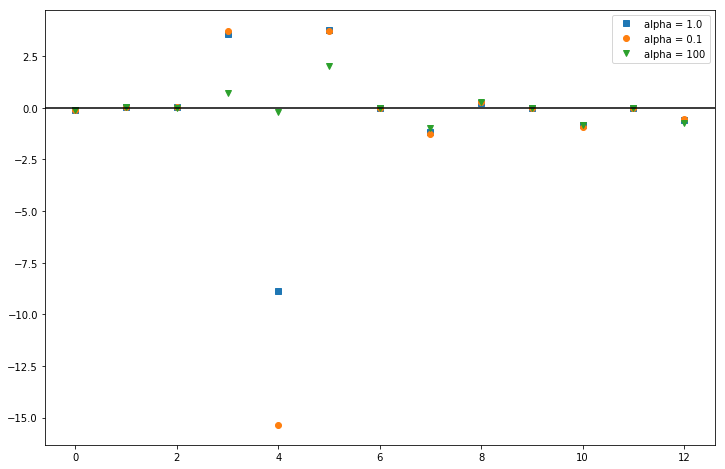

In [33]:
plt.figure(figsize = (12, 8))
plt.plot(ridge_default, 's', label = 'alpha = 1.0')
plt.plot(ridge_small, 'o', label = 'alpha = 0.1')
plt.plot(ridge_large, 'v', label = 'alpha = 100')
plt.axhline(color = 'black')
plt.legend()

In [15]:
model_test(Lasso())

Train r2 0.257422560934092
Test r2 0.21527582256592348
Train RMSE:  7.83988705088772
Test RMSE: 8.337802577356749


In [16]:
model_test(ElasticNet())

Train r2 0.2807179579050916
Test r2 0.2591671652210801
Train RMSE:  7.715934627851146
Test RMSE: 8.101271784144636


### Problem

Examine the plots of coefficients for three different values of alpha.  Compare and contrast what we see with the four models (`LinearRegression`, `Ridge`, `Lasso`, `ElasticNet`) in terms of the values of coefficients across alpha values, and the values from model to model.

If you have time, find the ideal value for our regularization parameter using the `GridSearchCV`.

### Classification and Regularization

Here, we are focused on `LogisticRegression`, and the use of different regularization parameters and values for these parameters.  The aim is to draw connections between what happens with Regularization across our least squares strategies.

In [36]:
clf = LogisticRegression()

In [37]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
cancer = load_breast_cancer()

In [39]:
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

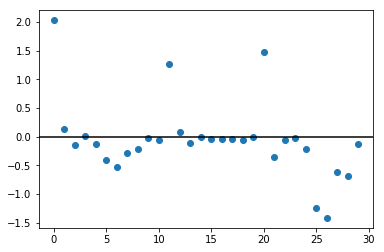

In [41]:
plt.plot(clf.coef_.T, 'o', label = 'Logistic Default')
plt.axhline(color = 'black')

In [42]:
clf_small = LogisticRegression(C = 0.1)
clf_small.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

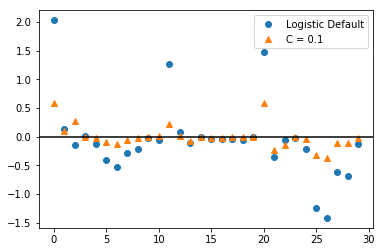

In [43]:
plt.plot(clf.coef_.T, 'o', label = 'Logistic Default')
plt.plot(clf_small.coef_.T, '^', label = 'C = 0.1')
plt.axhline(color = 'black')
plt.legend()

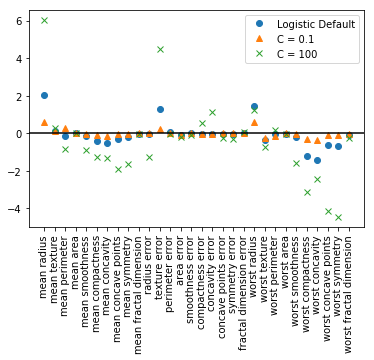

In [44]:
clf_big = LogisticRegression(C = 100)
clf_big.fit(X_train, y_train)
plt.plot(clf.coef_.T, 'o', label = 'Logistic Default')
plt.plot(clf_small.coef_.T, '^', label = 'C = 0.1')
plt.plot(clf_big.coef_.T, 'x', label = 'C = 100')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.axhline(color = 'black')
plt.legend()

### Applying L1 Regularization

In [45]:
clf_l1 = LogisticRegression(C = 1.0, penalty='l1')
clf_l1_small = LogisticRegression(C = 0.1, penalty='l1')
clf_l1_large = LogisticRegression(C = 100, penalty='l1')

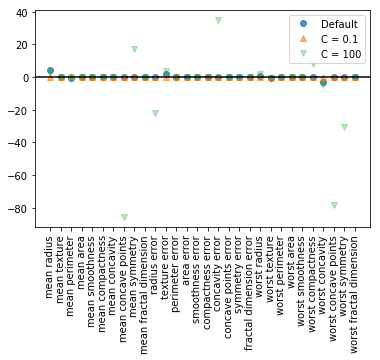

In [46]:
clf_l1.fit(X_train, y_train)
clf_l1_small.fit(X_train, y_train)
clf_l1_large.fit(X_train, y_train)

plt.plot(clf_l1.coef_.T, 'o', alpha = 0.8, label = 'Default')
plt.plot(clf_l1_small.coef_.T, '^', alpha = 0.6, label = 'C = 0.1')
plt.plot(clf_l1_large.coef_.T, 'v', alpha = 0.3, label = 'C = 100')
plt.axhline(color = 'black')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.legend()

### Takeaways

- We use regularization in both classification and regression
- Depending on the task, we want either `L1` or `L2` penalties
- We can grid search to find ideal `C`

In [47]:
from sklearn.linear_model import LogisticRegressionCV

In [48]:
clf = LogisticRegressionCV()

In [50]:
clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [51]:
clf.C_

array([166.81005372])